#Perhitungan Manual dengan mencoba salah satu partikel pada kecepatan dan posisi Partikel
Inisialisasi kecepatan awal particle pada PSO dilakukan dengan memberikan
nilai default 0 sedangkan posisi awal particle dilakukan secara random.  Pada perhitungan manual ini akan digunakan 3 particle dengan panjang particle sebanyak jumlah masukan (input) dan lebar sama dengan hidden neuron.

In [ ]:
#Import Library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

In [ ]:
#Input Data
df = pd.read_excel('/content/Data Baru PSO ELM.xlsx')
pd.options.display.max_columns = None
df

,Waktu,Temperatur,Kelembaban,Kecepatan Angin,Curah Hujan,Luas Area Terbakar
0,2014-01-01,25.51,88.90,0.76,6.50,69
1,2014-02-01,25.82,86.70,0.61,8.17,102
2,2014-03-01,26.31,87.46,0.55,9.63,134
3,2014-04-01,26.41,87.54,0.54,7.87,133
4,2014-05-01,26.56,88.22,0.62,6.85,302
...,...,...,...,...,...,...
115,2023-08-01,26.27,84.05,1.02,2.00,11596
116,2023-09-01,26.74,81.00,1.02,2.84,22617
117,2023-10-01,27.45,81.79,0.79,4.44,83438
118,2023-11-01,27.68,83.06,0.59,7.43,25882


In [ ]:
X1 = np.array(df.drop(['Luas Area Terbakar'], axis = 1))
Y1 = np.array(df['Luas Area Terbakar'])

#Pembagian 80:20
from sklearn.model_selection import train_test_split
x1train, x1test, y1train, y1test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
y1test.min()

np.int64(3)

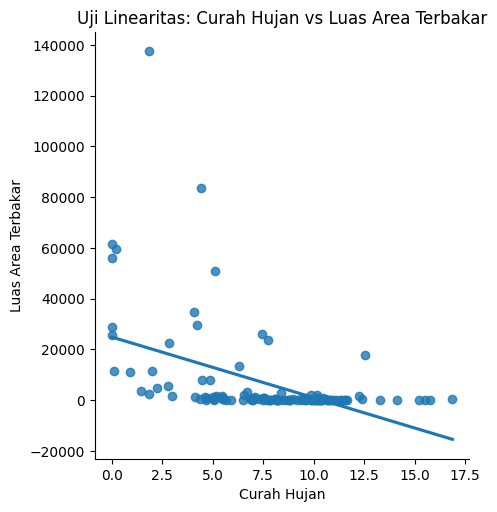

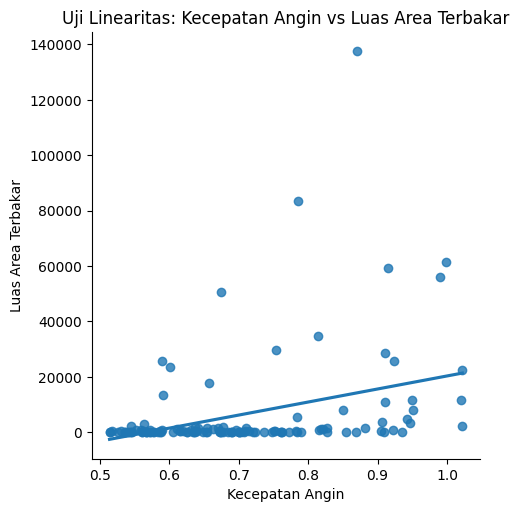

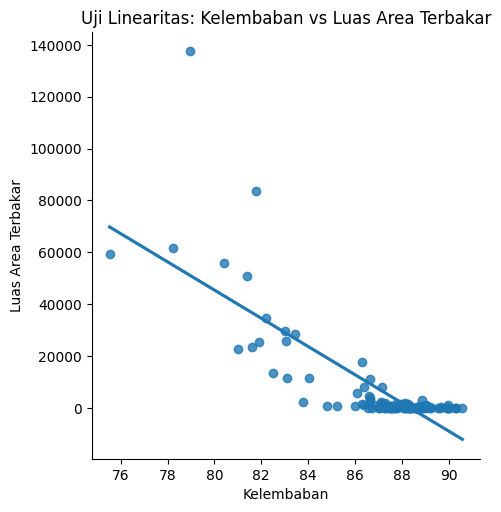

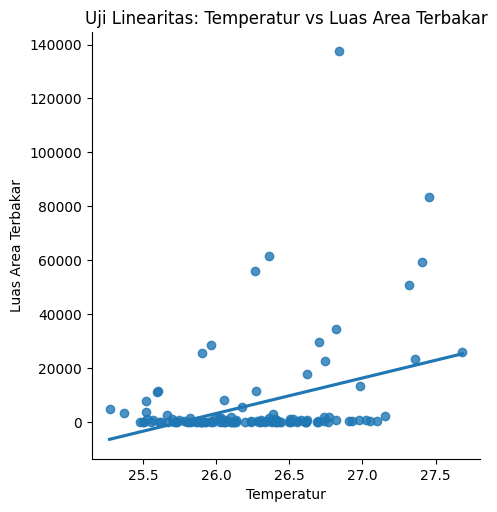

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# List semua variabel X
X_columns = ['Curah Hujan', 'Kecepatan Angin', 'Kelembaban', 'Temperatur']

# Looping scatter plot + garis regresi untuk tiap variabel
for col in X_columns:
    sns.lmplot(x=col, y='Luas Area Terbakar', data=df, ci=None)
    plt.title(f'Uji Linearitas: {col} vs Luas Area Terbakar')
    plt.xlabel(col)
    plt.ylabel('Luas Area Terbakar')
    plt.show()

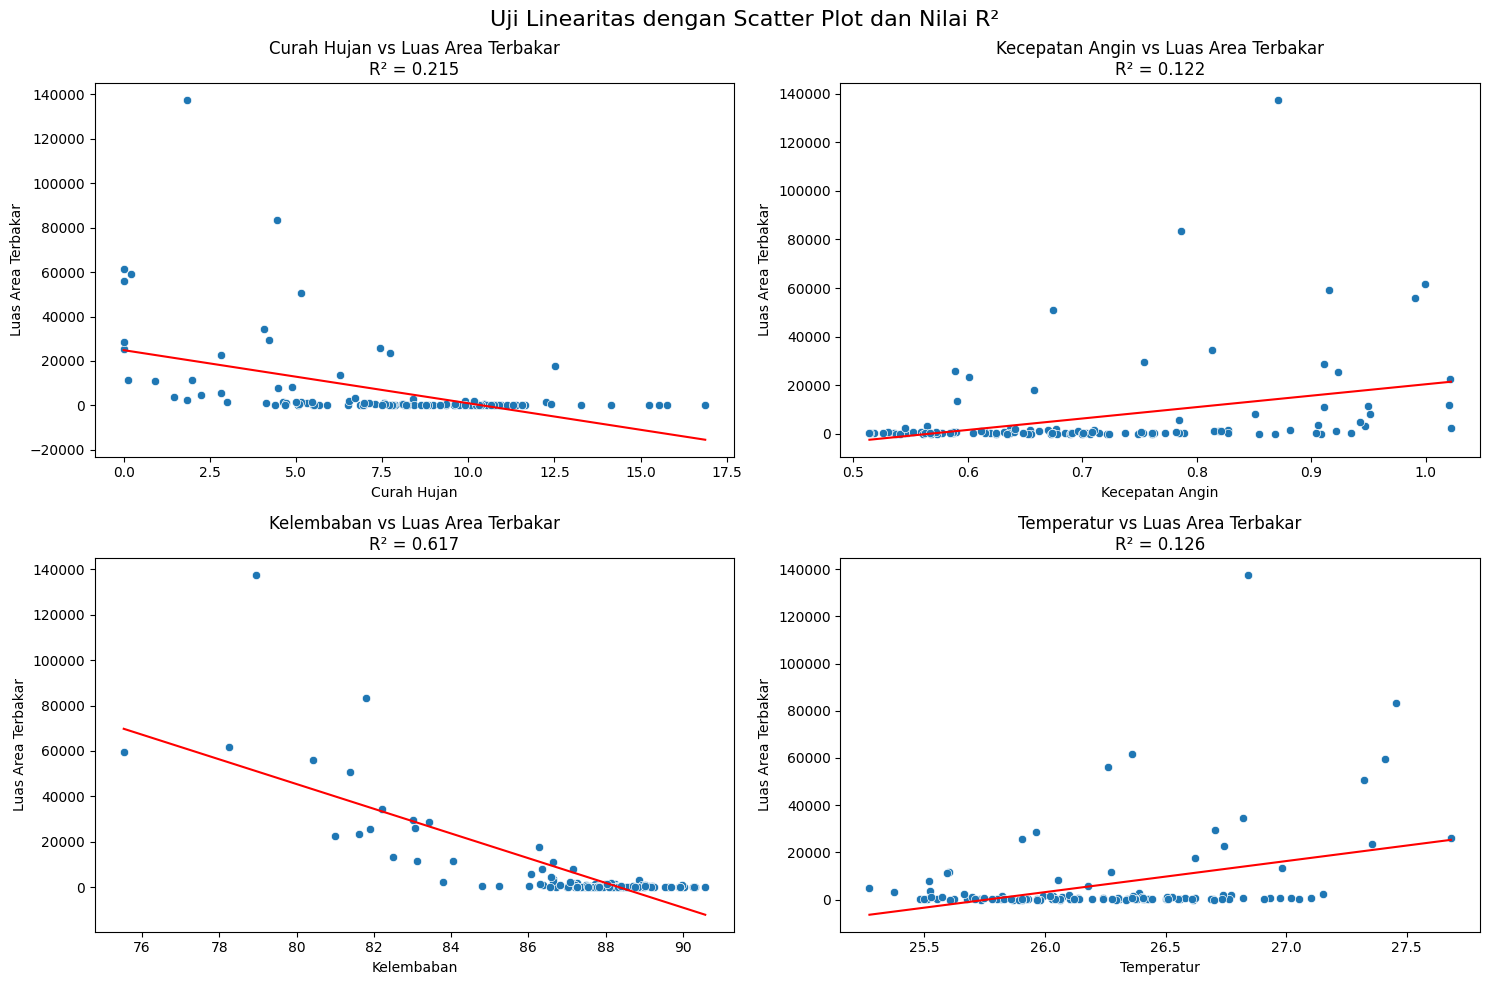

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Misalnya df sudah disiapkan
X_columns = ['Curah Hujan', 'Kecepatan Angin', 'Kelembaban', 'Temperatur']
y_column = 'Luas Area Terbakar'

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.ravel()

for i, col in enumerate(X_columns):
    X = df[[col]].values
    y = df[y_column].values

    # Linear Regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Scatter plot
    sns.scatterplot(x=col, y=y_column, data=df, ax=axs[i])
    sns.lineplot(x=df[col], y=y_pred, color='red', ax=axs[i])

    axs[i].set_title(f'{col} vs {y_column}\nR² = {r2:.3f}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Luas Area Terbakar')

plt.suptitle('Uji Linearitas dengan Scatter Plot dan Nilai R²', fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
df = df.drop(['Waktu'], axis = 1)
#Normalisasi Data (max-min)
from sklearn.preprocessing import MinMaxScaler

def modifikasi_minmax_scaler(column):
    return 0.8 * (column - column.min()) / (column.max() - column.min()) + 0.1

df_normalisasi = df.apply(modifikasi_minmax_scaler)

In [ ]:
#Pembagian data training dan data testing
#Penentuan X dan Y
X = np.array(df_normalisasi.drop(['Luas Area Terbakar'], axis = 1))
Y = np.array(df_normalisasi['Luas Area Terbakar'])

#Pembagian 80:20
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)
ytrain

array([0.10029103, 0.10016298, 0.10221181, 0.10807311, 0.10283461,
       0.10006403, 0.11101831, 0.10032595, 0.23687611, 0.10003492,
       0.26677047, 0.10041908, 0.1081837 , 0.10668199, 0.2506359 ,
       0.9       , 0.1171066 , 0.1038241 , 0.30143186, 0.10306743,
       0.10107098, 0.10054713, 0.10052385, 0.10600681, 0.42624778,
       0.1005937 , 0.1       , 0.10015715, 0.10213032, 0.12754867,
       0.1005937 , 0.10301505, 0.14583103, 0.11855592, 0.11176916,
       0.11423125, 0.1       , 0.10473211, 0.16695381, 0.10075085,
       0.10004074, 0.24888973, 0.10066354, 0.10002328, 0.10076249,
       0.1006519 , 0.10069847, 0.58564361, 0.10930124, 0.10012223,
       0.10069265, 0.10004074, 0.10516865, 0.10063444, 0.10522686,
       0.1001688 , 0.10566922, 0.10057041, 0.23163179, 0.10202555,
       0.10593114, 0.10035505, 0.10381828, 0.10001164, 0.10058206,
       0.27249789, 0.10081488, 0.10440034, 0.10204883, 0.10271238,
       0.10029103, 0.10435377, 0.10001746, 0.1036262 , 0.16748

In [ ]:
# Inisialisasi parameter PSO
num_particles = 60
num_dimensions = X.shape[1]  # Jumlah fitur pada data input
num_hidden_neurons = 7
# Parameter bobot inertia
w_max = 0.9  # Nilai maksimum bobot inertia
w_min = 0.4  # Nilai minimum bobot inertia
max_iterations = 1000  # Iterasi maksimum
c1 = 2 # Cognitive parameter
c2 = 1.95  # Social parameter

In [ ]:
# Inisialisasi input weight dan bias untuk setiap partikel
def initialize_particles(num_particles, num_hidden_neurons, num_dimensions):
    # Inisialisasi input weight (7x4) dalam range [-5, 5]
    input_weights = np.random.uniform(-1, 1, (num_particles, num_hidden_neurons, num_dimensions))

    # Inisialisasi bias (1x7) dalam range [0, 1]
    biases = np.random.uniform(0, 1, (num_particles, num_hidden_neurons))

    return input_weights, biases

# Panggil fungsi inisialisasi
input_weights, biases = initialize_particles(num_particles, num_hidden_neurons, num_dimensions)

In [ ]:
# Fungsi untuk memperbanyak matriks bias
def expand_biases(biases, k):
    return np.array([np.tile(bias, (k, 1)) for bias in biases])

# Fungsi untuk menghitung H_init_train
def calculate_H_init_train(X_train, input_weights, expanded_biases):
    # Transposisi bobot input (W^T)
    transposed_input_weights = np.transpose(input_weights, (0, 2, 1))

    # Hitung matriks H_init_train
    H_init_train = np.array([np.dot(X_train, wt) + b for wt, b in zip(transposed_input_weights, expanded_biases)])

    return H_init_train

In [ ]:
# Inisialisasi bobot input dalam rentang [-1, 1]
input_weights = np.random.uniform(-1, 1, (num_particles, num_hidden_neurons, num_dimensions))

# Inisialisasi bias dalam rentang [0, 1]
biases = np.random.uniform(0, 1, (num_particles, num_hidden_neurons))

# Jumlah data training
k = xtrain.shape[0]

# Memperbanyak matriks bias untuk setiap partikel
expanded_biases = np.array([np.tile(bias, (k, 1)) for bias in biases])

# Hitung matriks H_init_train
transposed_input_weights = np.transpose(input_weights, (0, 2, 1))
H_init_train = np.array([np.dot(xtrain, wt) + b for wt, b in zip(transposed_input_weights, expanded_biases)])

# Pilih partikel tertentu (10 partikel pertama)
selected_particles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
                      37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]  # Indeks 10 partikel pertama

# Fungsi aktivasi sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Hitung H menggunakan sigmoid
H = sigmoid(H_init_train)

In [ ]:
print("H Shape after sigmoid:", H.shape)

H Shape after sigmoid: (60, 96, 7)


In [ ]:
for idx in selected_particles:
    print(f"\nPartikel {idx + 1}:")
    print("Bobot Input:")
    print(input_weights[idx])


Partikel 1:
Bobot Input:
[[ 0.36392318 -0.90880451  0.81814126 -0.39563861]
 [ 0.02169506  0.7308119   0.30842608  0.45002742]
 [-0.92060409 -0.42106397  0.50500635  0.27979863]
 [ 0.99267038 -0.73964271  0.75362458  0.79729289]
 [-0.42048441 -0.91120382 -0.79432925  0.2699795 ]
 [ 0.75716142  0.74758594  0.96524371 -0.57742965]
 [ 0.99790083 -0.15048914  0.10684993 -0.2201995 ]]

Partikel 2:
Bobot Input:
[[ 0.02505977  0.47350073 -0.47444337 -0.2888671 ]
 [ 0.44713431  0.96443017 -0.93603172 -0.11793852]
 [-0.24969049 -0.36943936  0.89035649 -0.769397  ]
 [ 0.63824011 -0.5544408   0.9648415   0.91018756]
 [-0.24164383  0.3286083  -0.79030364 -0.03019771]
 [-0.78891763 -0.9489374  -0.71921284 -0.79491626]
 [-0.33290908 -0.85968066 -0.67618042 -0.41764397]]

Partikel 3:
Bobot Input:
[[ 0.2105455   0.20154594  0.57525577 -0.3368579 ]
 [ 0.27769488 -0.94600694 -0.91884325  0.13313695]
 [-0.70655709 -0.92915474 -0.31058215 -0.708266  ]
 [-0.33372374  0.22710796  0.17878362 -0.90667834]
 [

In [ ]:
for idx in selected_particles:
    print(f"\nPartikel {idx + 1}:")
    print("Bias:")
    print(biases[idx])


Partikel 1:
Bias:
[0.3334646  0.68038375 0.38396346 0.98666722 0.9060893  0.93045571
 0.17023702]

Partikel 2:
Bias:
[0.43266227 0.81882231 0.13149536 0.14879632 0.25959633 0.2297835
 0.84170607]

Partikel 3:
Bias:
[0.92093392 0.23603718 0.00378789 0.04236385 0.46316756 0.66948491
 0.340168  ]

Partikel 4:
Bias:
[0.75519965 0.629215   0.07311535 0.85254843 0.85175742 0.63207097
 0.83191521]

Partikel 5:
Bias:
[0.46484336 0.23280504 0.59133142 0.00184622 0.12367171 0.50993776
 0.61413373]

Partikel 6:
Bias:
[0.49726837 0.10830333 0.16826116 0.10308151 0.19271881 0.08746838
 0.75500081]

Partikel 7:
Bias:
[0.79102732 0.95960683 0.38805594 0.24041237 0.06546276 0.71600197
 0.69145165]

Partikel 8:
Bias:
[0.51297952 0.77577914 0.94586378 0.10534285 0.00945278 0.80741103
 0.07022003]

Partikel 9:
Bias:
[0.7918895  0.66765184 0.11504577 0.48612423 0.04935288 0.8083718
 0.80695259]

Partikel 10:
Bias:
[0.93022924 0.84470342 0.03976561 0.60555751 0.8591911  0.90806809
 0.33670244]

Partikel 1

In [ ]:
for idx in selected_particles:
    print(f"\nPartikel {idx + 1}:")
    print("H_init_train Shape:", H_init_train[idx].shape)
    print("H_init_train:")


NameError: name 'selected_particles' is not defined

In [ ]:
with open("hasil_H_init_train_fix.txt", "w") as f:
    for idx in selected_particles:
        f.write(f"\nPartikel {idx + 1}:\n")
        f.write(f"H_init_train Shape: {H_init_train[idx].shape}\n")
        f.write("H_init_train:\n")
        np.savetxt(f, H_init_train[idx][:96], fmt="%.6f")  # Simpan matriks ke file dengan format angka 6 desimal

print("File hasil_H_init_train.txt berhasil disimpan.")

from google.colab import files
files.download("hasil_H_init_train_fix.txt")

File hasil_H_init_train.txt berhasil disimpan.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Cetak hasil untuk partikel tertentu
for idx in selected_particles:
    print(f"\nPartikel {idx + 1}:")
    print("H (Hidden Layer) Shape:", H.shape)
    print(H[:1])
    print(H[-1])

Streaming output truncated to the last 5000 lines.
  [0.55127819 0.79185184 0.39683437 0.88439518 0.50519625 0.87382262
   0.71439271]
  [0.6836623  0.76639433 0.52022401 0.88518149 0.47841395 0.8948465
   0.68490139]
  [0.45663506 0.81381691 0.47218115 0.8138233  0.51759934 0.84411732
   0.60969615]
  [0.44945683 0.82775532 0.46421565 0.83323211 0.49807831 0.85284169
   0.61876588]
  [0.62113206 0.79171485 0.49950556 0.87257798 0.46449879 0.89267107
   0.67052442]
  [0.46433126 0.82523451 0.407676   0.8333058  0.45590392 0.88279626
   0.6635962 ]
  [0.43052292 0.82880183 0.48423713 0.8169816  0.51256799 0.83923296
   0.59257086]
  [0.44730079 0.83256429 0.50602754 0.80554231 0.48230536 0.85672681
   0.58120758]
  [0.44435556 0.84435804 0.50120072 0.81958092 0.4572091  0.86835337
   0.58821837]
  [0.50455671 0.83124735 0.56125962 0.77571995 0.42554879 0.8883584
   0.55710226]
  [0.69386867 0.77903521 0.57325009 0.86609155 0.43775334 0.90777304
   0.64855154]
  [0.45014215 0.80465184 0.

In [ ]:
with open("output_H_hidden_layer_fix.txt", "w") as f:
    for idx in selected_particles:
        f.write(f"\nPartikel {idx + 1}:\n")
        f.write(f"H (Hidden Layer) Shape: {H[idx].shape}\n")
        f.write("H (Hidden Layer):\n")
        np.savetxt(f, H[idx], fmt="%.6f")  # Menyimpan slice per partikel

print("File output_H_hidden_layer.txt berhasil disimpan.")

from google.colab import files
files.download("output_H_hidden_layer_fix.txt")

File output_H_hidden_layer.txt berhasil disimpan.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
print("H_init_train Shape:", H_init_train.shape)
print("H Shape before reshape:", H.shape)
print("Total elements in H:", H.size)

H_init_train Shape: (60, 96, 7)
H Shape before reshape: (60, 96, 7)
Total elements in H: 40320


In [ ]:
# Pastikan H tetap berupa list dari matriks untuk semua partikel
H_list = H

H_pseudo_inverse_list = []  # List untuk menyimpan H+ setiap partikel

for i in range(H.shape[0]):  # Iterasi untuk setiap partikel (jumlah partikel = 60)
    particle_H = H[i]  # Ambil matriks H dari partikel ke-i dengan shape (96,7)

    # Periksa apakah dimensinya benar
    print(f"Particle {i} - H shape: {particle_H.shape}")  # Harusnya (96, 7)

    # Hitung Pseudo-Inverse
    H_transpose = np.transpose(particle_H)  # (7, 96)
    HTH = np.dot(H_transpose, particle_H)   # (7, 7)
    HTH_inv = np.linalg.pinv(HTH)           # (7, 7) - Pseudo-Inverse
    H_pseudo_inverse = np.dot(HTH_inv, H_transpose)  # (7, 96)

    print(f"Particle {i} - H_pseudo_inverse shape: {H_pseudo_inverse.shape}")  # Harusnya (7,96)

    H_pseudo_inverse_list.append(H_pseudo_inverse)  # Simpan hasil untuk partikel ini


# Hitung Output Weight (β̂) untuk semua partikel
beta_hat_list = []

for h_pseudo_inverse in H_pseudo_inverse_list:
    beta_hat = np.dot(h_pseudo_inverse, ytrain)  # Pastikan ytrain sudah (N,1)
    beta_hat_list.append(beta_hat)

# Cetak hasil untuk partikel tertentu
selected_particles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
                      37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]

Particle 0 - H shape: (96, 7)
Particle 0 - H_pseudo_inverse shape: (7, 96)
Particle 1 - H shape: (96, 7)
Particle 1 - H_pseudo_inverse shape: (7, 96)
Particle 2 - H shape: (96, 7)
Particle 2 - H_pseudo_inverse shape: (7, 96)
Particle 3 - H shape: (96, 7)
Particle 3 - H_pseudo_inverse shape: (7, 96)
Particle 4 - H shape: (96, 7)
Particle 4 - H_pseudo_inverse shape: (7, 96)
Particle 5 - H shape: (96, 7)
Particle 5 - H_pseudo_inverse shape: (7, 96)
Particle 6 - H shape: (96, 7)
Particle 6 - H_pseudo_inverse shape: (7, 96)
Particle 7 - H shape: (96, 7)
Particle 7 - H_pseudo_inverse shape: (7, 96)
Particle 8 - H shape: (96, 7)
Particle 8 - H_pseudo_inverse shape: (7, 96)
Particle 9 - H shape: (96, 7)
Particle 9 - H_pseudo_inverse shape: (7, 96)
Particle 10 - H shape: (96, 7)
Particle 10 - H_pseudo_inverse shape: (7, 96)
Particle 11 - H shape: (96, 7)
Particle 11 - H_pseudo_inverse shape: (7, 96)
Particle 12 - H shape: (96, 7)
Particle 12 - H_pseudo_inverse shape: (7, 96)
Particle 13 - H sha

In [ ]:
# Cetak hasil
for idx in selected_particles:
  print(f"\nPartikel {idx + 1}:")
  H_pseudo_inverse = H_pseudo_inverse_list[idx]
  print("Matriks Moore-Penrose Pseudo Inverse (H^+) Shape:", H_pseudo_inverse.shape)
  print("\nMatriks Moore-Penrose Pseudo Inverse (H^+):")
  print(H_pseudo_inverse)

Streaming output truncated to the last 5000 lines.
   1.57119256e+00  2.08999706e+01  6.89469117e+00  1.26700493e+01
   1.19694430e+01  4.79409063e+00 -1.69566743e+00  8.55036668e+00
  -2.28674498e-02  3.73859588e+00  3.63656238e+00  4.90200137e+00
   4.75845965e+00  3.59179704e+00  7.24773363e+00 -1.45682288e+01
  -1.74124879e+00  3.96425339e-01 -2.89481708e-01  7.51510568e-01
  -1.60939262e+01  2.97652959e+00 -1.35177864e+00  8.62505455e+00
  -6.78272731e+00  6.57551579e+00  8.29486775e+00 -2.15349794e+01
   1.05501885e+01  3.59418248e+01  1.05729012e+01  7.77702681e-01
  -5.99991599e+00  7.97167611e+00  3.63972343e-01 -3.89309058e+00
  -2.97313245e+00  2.65608076e+00  7.67736403e+00 -2.78216024e+01
   1.44397845e+00  3.88656197e+00  6.70721083e+00  1.37921244e+01
   2.60706681e+00 -8.19094238e+00  9.10547580e+00  2.45881799e+00]
 [-1.42612266e+00  1.50322983e+00 -5.47288441e-01 -4.37758821e-01
   3.17661195e+00  1.86007521e+00  6.47320028e-01 -3.48936119e+00
  -9.68730230e-01  5.860

In [ ]:
# Cetak hasil
for idx in selected_particles:
  print(f"\nPartikel {idx + 1}:")
  H_pseudo_inverse = H_pseudo_inverse_list[idx]
  print("Matriks Moore-Penrose Pseudo Inverse (H^+) Shape:", H_pseudo_inverse.shape)
  print("\nMatriks Moore-Penrose Pseudo Inverse (H^+):")
  print(H_pseudo_inverse)

Streaming output truncated to the last 5000 lines.
   1.57119256e+00  2.08999706e+01  6.89469117e+00  1.26700493e+01
   1.19694430e+01  4.79409063e+00 -1.69566743e+00  8.55036668e+00
  -2.28674498e-02  3.73859588e+00  3.63656238e+00  4.90200137e+00
   4.75845965e+00  3.59179704e+00  7.24773363e+00 -1.45682288e+01
  -1.74124879e+00  3.96425339e-01 -2.89481708e-01  7.51510568e-01
  -1.60939262e+01  2.97652959e+00 -1.35177864e+00  8.62505455e+00
  -6.78272731e+00  6.57551579e+00  8.29486775e+00 -2.15349794e+01
   1.05501885e+01  3.59418248e+01  1.05729012e+01  7.77702681e-01
  -5.99991599e+00  7.97167611e+00  3.63972343e-01 -3.89309058e+00
  -2.97313245e+00  2.65608076e+00  7.67736403e+00 -2.78216024e+01
   1.44397845e+00  3.88656197e+00  6.70721083e+00  1.37921244e+01
   2.60706681e+00 -8.19094238e+00  9.10547580e+00  2.45881799e+00]
 [-1.42612266e+00  1.50322983e+00 -5.47288441e-01 -4.37758821e-01
   3.17661195e+00  1.86007521e+00  6.47320028e-01 -3.48936119e+00
  -9.68730230e-01  5.860

In [ ]:
for idx in selected_particles:
    print(f"\nPartikel {idx + 1}:")
    print("Output Weight (β̂):")
    print(beta_hat_list[idx])


Partikel 1:
Output Weight (β̂):
[-1.51979313 -7.29947289 -0.1551329   4.41660992  1.10972374  5.5010012
 -3.23801761]

Partikel 2:
Output Weight (β̂):
[-7.35686802  5.18428787  0.52015175  0.6990224  -1.23488642  3.52629693
 -0.34820235]

Partikel 3:
Output Weight (β̂):
[  1.51944182  -0.39886626   4.47876033 -24.80683516  13.50393359
 -11.4508267   16.81145352]

Partikel 4:
Output Weight (β̂):
[  6.55650029   2.13507346  10.19930388   6.69269175 -15.92255494
 -16.71216798   9.45887001]

Partikel 5:
Output Weight (β̂):
[  4.08899075  -7.50245905   9.51746729   9.92371288  19.73981655
 -13.8843372  -15.71558689]

Partikel 6:
Output Weight (β̂):
[-2.44605554  6.2659733   3.41577086  3.0075632  -1.09579226  1.05573803
 -7.10847726]

Partikel 7:
Output Weight (β̂):
[ 5.73666976e+01 -5.65688481e+01  4.99506223e+00  3.62724968e-02
 -1.50882352e+00  6.27940647e-01 -1.89123426e+00]

Partikel 8:
Output Weight (β̂):
[  9.3752878   -7.21471515   6.00742388  -4.73480496   6.29321593
 -14.08828297

In [ ]:
# Hitung matriks prediksi data training untuk semua partikel
train_predictions_list = []

for i, particle_H in enumerate(H_list):  # Iterasi pada setiap matriks partikel
    if particle_H.ndim == 1:  # Jika berbentuk (7,), ubah ke (7,1)
        particle_H = particle_H.reshape(-1, 1)

    # Hitung prediksi data training
    train_prediction = np.dot(particle_H, beta_hat_list[i])
    train_predictions_list.append(train_prediction)

# Cetak hasil prediksi untuk partikel tertentu
selected_particles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
                      37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]  # Indeks 10 partikel pertama

In [ ]:
for i in selected_particles:
    print(f"Prediksi data training untuk partikel {i+1}:")
    print(train_predictions_list[i])

Prediksi data training untuk partikel 1:
[0.05605072 0.1045151  0.10085209 0.11997898 0.09411269 0.10399307
 0.14480995 0.10661743 0.31759238 0.10045536 0.26496875 0.0718358
 0.10644461 0.06459235 0.28084802 0.4312338  0.13033977 0.12342481
 0.30813355 0.10113281 0.0957212  0.08830001 0.08284662 0.05968853
 0.37459989 0.09969761 0.09390836 0.12058782 0.08684429 0.14629116
 0.12185499 0.08294286 0.17579259 0.11186455 0.15520292 0.25318288
 0.11769537 0.11839332 0.2768145  0.09578686 0.10088054 0.3283594
 0.04159826 0.07801183 0.093912   0.05749359 0.07479452 0.30886743
 0.09894557 0.09194717 0.08799743 0.07539701 0.08819607 0.0767676
 0.14613138 0.10761228 0.15844424 0.12807019 0.30720978 0.1412433
 0.13387937 0.03389065 0.1935757  0.09156106 0.06977272 0.28791182
 0.10027956 0.16315342 0.10320033 0.11797462 0.09608025 0.11026653
 0.090468   0.07924678 0.22321376 0.10169141 0.09043424 0.55368759
 0.09539974 0.16815283 0.10042893 0.12208348 0.16402203 0.08521626
 0.11958592 0.07253828 0.

In [ ]:
print(train_prediction.min(), train_prediction.max())

0.0482232132714735 0.5577266232750695


In [ ]:
from sklearn.metrics import mean_squared_error

max_vals = {'Target': df['Luas Area Terbakar'].max()}  # Store max value of 'Luas Area Terbakar'
min_vals = {'Target': df['Luas Area Terbakar'].min()}  # Store min value of 'Luas Area Terbakar'

# Denormalization
y_pred_train_denorm = (train_prediction - 0.1) * (max_vals['Target'] - min_vals['Target']) / 0.8 + min_vals['Target']
y_train_denorm = (ytrain - 0.1) * (max_vals['Target'] - min_vals['Target']) / 0.8 + min_vals['Target']

mse = mean_squared_error(y_train_denorm, y_pred_train_denorm)
rmse = np.sqrt(mse)

print(f"rmse: {rmse:.4f}")

rmse: 11730.1654


In [ ]:
# Calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(y_train_denorm, y_pred_train_denorm)
print(f"MAPE: {mape:.2f}%")

MAPE: 49.74%


In [ ]:
# Fungsi untuk denormalisasi data
def denormalize(predicted_values, min_value, max_value):
    """
    Denormalisasi nilai prediksi.
    Rumus: y_hat_j = ((y_hat'_j - 0.10) * (max_value - min_value)) / 0.8 + min_value
    """
    return ((predicted_values - 0.10) * (max_value - min_value)) / 0.8 + min_value

# Fungsi untuk menghitung RMSE
def calculate_rmse(actual_values, predicted_values):
    """
    Menghitung RMSE (Root Mean Squared Error).
    Rumus: RMSE = sqrt(mean((actual - predicted)^2))
    """
    return np.sqrt(np.mean((actual_values - predicted_values) ** 2))

# Contoh data asli (misalnya, data target asli)
# Ganti dengan data target asli (belum dinormalisasi)
y_train_actual = y1train  # Ambil kolom target asli
min_value = 2  # Nilai minimum data asli
max_value = 137446  # Nilai maksimum data asli

# Denormalisasi hasil prediksi untuk setiap partikel
denormalized_predictions_list = []

for train_prediction in train_predictions_list:
    denormalized_prediction = denormalize(train_prediction, min_value, max_value)
    denormalized_predictions_list.append(denormalized_prediction)

# Hitung RMSE untuk setiap partikel
rmse_list = []

for denormalized_prediction in denormalized_predictions_list:
    rmse = calculate_rmse(y_train_actual[:len(denormalized_prediction)], denormalized_prediction)
    rmse_list.append(rmse)

# Cetak RMSE untuk partikel tertentu (misalnya, 10 partikel pertama)
selected_particles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
                      37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]  # Indeks 10 partikel pertama

In [ ]:
# Fungsi untuk mencetak hasil denormalisasi
def print_denormalized_results(particle_index, train_prediction, denormalized_prediction, y_train_actual):
    print(f"\nPartikel {particle_index + 1}:")
    print("Prediksi Sebelum Denormalisasi :")
    print(train_prediction[:96])  # Cetak 5 nilai pertama
    print("Prediksi Setelah Denormalisasi :")
    print(denormalized_prediction[:96])  # Cetak 5 nilai pertama
    print("Nilai Aktual :")
    print(y_train_actual[:96])  # Cetak 5 nilai pertama
    print("Rentang Prediksi Setelah Denormalisasi:")
    print(f"Min: {denormalized_prediction.min()}, Max: {denormalized_prediction.max()}")

# Cek hasil denormalisasi untuk beberapa partikel
selected_particles = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36,
                      37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]  # Cek 5 partikel pertama
for i in selected_particles:
    train_prediction = train_predictions_list[i]  # Prediksi dalam skala normalisasi
    denormalized_prediction = denormalized_predictions_list[i]  # Prediksi setelah denormalisasi
    print_denormalized_results(i, train_prediction, denormalized_prediction, y_train_actual)



Partikel 1:
Prediksi Sebelum Denormalisasi :
[0.05605072 0.1045151  0.10085209 0.11997898 0.09411269 0.10399307
 0.14480995 0.10661743 0.31759238 0.10045536 0.26496875 0.0718358
 0.10644461 0.06459235 0.28084802 0.4312338  0.13033977 0.12342481
 0.30813355 0.10113281 0.0957212  0.08830001 0.08284662 0.05968853
 0.37459989 0.09969761 0.09390836 0.12058782 0.08684429 0.14629116
 0.12185499 0.08294286 0.17579259 0.11186455 0.15520292 0.25318288
 0.11769537 0.11839332 0.2768145  0.09578686 0.10088054 0.3283594
 0.04159826 0.07801183 0.093912   0.05749359 0.07479452 0.30886743
 0.09894557 0.09194717 0.08799743 0.07539701 0.08819607 0.0767676
 0.14613138 0.10761228 0.15844424 0.12807019 0.30720978 0.1412433
 0.13387937 0.03389065 0.1935757  0.09156106 0.06977272 0.28791182
 0.10027956 0.16315342 0.10320033 0.11797462 0.09608025 0.11026653
 0.090468   0.07924678 0.22321376 0.10169141 0.09043424 0.55368759
 0.09539974 0.16815283 0.10042893 0.12208348 0.16402203 0.08521626
 0.11958592 0.072538

In [ ]:
for i in selected_particles:
    print(f"RMSE untuk partikel {i + 1}: {rmse_list[i]:.4f}")

RMSE untuk partikel 1: 11543.6398
RMSE untuk partikel 2: 11422.0993
RMSE untuk partikel 3: 11117.9447
RMSE untuk partikel 4: 10864.2356
RMSE untuk partikel 5: 10956.6388
RMSE untuk partikel 6: 10880.7662
RMSE untuk partikel 7: 11851.0176
RMSE untuk partikel 8: 11319.5573
RMSE untuk partikel 9: 10786.0518
RMSE untuk partikel 10: 11017.1518
RMSE untuk partikel 11: 11534.3628
RMSE untuk partikel 12: 11610.3620
RMSE untuk partikel 13: 10745.6685
RMSE untuk partikel 14: 11290.4469
RMSE untuk partikel 15: 11468.3835
RMSE untuk partikel 16: 11140.4997
RMSE untuk partikel 17: 11319.2922
RMSE untuk partikel 18: 11065.2169
RMSE untuk partikel 19: 10914.5884
RMSE untuk partikel 20: 11198.5134
RMSE untuk partikel 21: 11276.2054
RMSE untuk partikel 22: 11101.4363
RMSE untuk partikel 23: 11183.5447
RMSE untuk partikel 24: 11025.3111
RMSE untuk partikel 25: 10700.2308
RMSE untuk partikel 26: 11331.0783
RMSE untuk partikel 27: 10998.8606
RMSE untuk partikel 28: 11287.2303
RMSE untuk partikel 30: 11080

In [ ]:
def calculate_rmse(actual_values, predicted_values):
    """
    Menghitung RMSE (Root Mean Squared Error).
    Rumus: RMSE = sqrt(mean((actual - predicted)^2))
    """
    squared_errors = (actual_values - predicted_values)**2
    mean_squared_error = np.mean(squared_errors)
    return np.sqrt(mean_squared_error)

def fitness_function(rmse):
    """
    Menghitung fitness dari RMSE.
    Fitness didefinisikan sebagai kebalikan dari RMSE,
    sehingga fitness yang lebih tinggi menunjukkan RMSE yang lebih rendah (lebih baik).
    """
    # Menambahkan konstanta kecil untuk mencegah pembagian dengan nol
    epsilon = 1e-10
    fitness = 1 / (rmse + epsilon)
    return fitness

In [ ]:
# Hitung fitness untuk setiap partikel
fitness_values = [fitness_function(rmse) for rmse in rmse_list]

# Cetak fitness untuk partikel tertentu
for i in selected_particles:
    print(f"Fitness untuk partikel {i + 1}: {fitness_values[i]:.4f}")

Fitness untuk partikel 1: 0.0001
Fitness untuk partikel 2: 0.0001
Fitness untuk partikel 3: 0.0001
Fitness untuk partikel 4: 0.0001
Fitness untuk partikel 5: 0.0001
Fitness untuk partikel 6: 0.0001
Fitness untuk partikel 7: 0.0001
Fitness untuk partikel 8: 0.0001
Fitness untuk partikel 9: 0.0001
Fitness untuk partikel 10: 0.0001
Fitness untuk partikel 11: 0.0001
Fitness untuk partikel 12: 0.0001
Fitness untuk partikel 13: 0.0001
Fitness untuk partikel 14: 0.0001
Fitness untuk partikel 15: 0.0001
Fitness untuk partikel 16: 0.0001
Fitness untuk partikel 17: 0.0001
Fitness untuk partikel 18: 0.0001
Fitness untuk partikel 19: 0.0001
Fitness untuk partikel 20: 0.0001
Fitness untuk partikel 21: 0.0001
Fitness untuk partikel 22: 0.0001
Fitness untuk partikel 23: 0.0001
Fitness untuk partikel 24: 0.0001
Fitness untuk partikel 25: 0.0001
Fitness untuk partikel 26: 0.0001
Fitness untuk partikel 27: 0.0001
Fitness untuk partikel 28: 0.0001
Fitness untuk partikel 30: 0.0001
Fitness untuk partikel 

In [ ]:
# Inisialisasi Pbest
pbest_positions = [
    {'input_weights': input_weights[i].copy(), 'biases': biases[i].copy()}
    for i in range(len(input_weights))
]  # Pbest awal sama dengan posisi awal partikel
pbest_fitness = fitness_values.copy()  # Fitness Pbest awal sama dengan fitness awal partikel

# Cetak Pbest dan Gbest
print("Inisialisasi Pbest dan Gbest:")
for i in range(num_particles):
    print(f"Partikel {i + 1}:")
    print(f"  Pbest Position: {pbest_positions[i]}")
    print(f"  Pbest Fitness: {pbest_fitness[i]:.4f}")

Inisialisasi Pbest dan Gbest:
Partikel 1:
  Pbest Position: {'input_weights': array([[ 0.36392318, -0.90880451,  0.81814126, -0.39563861],
       [ 0.02169506,  0.7308119 ,  0.30842608,  0.45002742],
       [-0.92060409, -0.42106397,  0.50500635,  0.27979863],
       [ 0.99267038, -0.73964271,  0.75362458,  0.79729289],
       [-0.42048441, -0.91120382, -0.79432925,  0.2699795 ],
       [ 0.75716142,  0.74758594,  0.96524371, -0.57742965],
       [ 0.99790083, -0.15048914,  0.10684993, -0.2201995 ]]), 'biases': array([0.3334646 , 0.68038375, 0.38396346, 0.98666722, 0.9060893 ,
       0.93045571, 0.17023702])}
  Pbest Fitness: 0.0001
Partikel 2:
  Pbest Position: {'input_weights': array([[ 0.02505977,  0.47350073, -0.47444337, -0.2888671 ],
       [ 0.44713431,  0.96443017, -0.93603172, -0.11793852],
       [-0.24969049, -0.36943936,  0.89035649, -0.769397  ],
       [ 0.63824011, -0.5544408 ,  0.9648415 ,  0.91018756],
       [-0.24164383,  0.3286083 , -0.79030364, -0.03019771],
      

In [ ]:
# Inisialisasi Gbest
gbest_index = np.argmax(fitness_values)  # Indeks partikel dengan fitness terbaik
gbest_position = pbest_positions[gbest_index].copy()  # Posisi Gbest
gbest_fitness = fitness_values[gbest_index]  # Fitness Gbest

# Cetak Pbest dan Gbest
print("Inisialisasi Pbest dan Gbest:")
for i in range(num_particles):
    print(f"Partikel {i + 1}:")
    print(f"  Gbest Position: {gbest_position}")
    print(f"  Gbest Fitness: {gbest_fitness:.4f}")

Inisialisasi Pbest dan Gbest:
Partikel 1:
  Gbest Position: {'input_weights': array([[-0.51141736,  0.86736821,  0.91255023, -0.98136295],
       [-0.52670531,  0.74569219,  0.77702509, -0.71866112],
       [ 0.52564017, -0.75580553,  0.89494655,  0.73824386],
       [-0.10145231, -0.89029234,  0.19597084, -0.49494191],
       [ 0.14473652,  0.32092528,  0.92767732, -0.21356602],
       [-0.03421735, -0.97759549, -0.03132131,  0.0178207 ],
       [ 0.21764347,  0.01570874, -0.26765265, -0.83157023]]), 'biases': array([0.90052003, 0.29685965, 0.22866632, 0.63864036, 0.51206877,
       0.18694114, 0.84276033])}
  Gbest Fitness: 0.0001
Partikel 2:
  Gbest Position: {'input_weights': array([[-0.51141736,  0.86736821,  0.91255023, -0.98136295],
       [-0.52670531,  0.74569219,  0.77702509, -0.71866112],
       [ 0.52564017, -0.75580553,  0.89494655,  0.73824386],
       [-0.10145231, -0.89029234,  0.19597084, -0.49494191],
       [ 0.14473652,  0.32092528,  0.92767732, -0.21356602],
      

In [ ]:
# Inisialisasi kecepatan dengan nilai acak kecil
velocities = [
    {'input_weights': np.random.uniform(-0.1, 0.1, (num_hidden_neurons, num_dimensions)),
     'biases': np.random.uniform(-0.1, 0.1, num_hidden_neurons)}
    for _ in range(num_particles)
]


In [ ]:
# Fungsi untuk menghitung inertia weight dinamis
def calculate_inertia_weight(iteration, w_max, w_min, max_iterations):
    return w_max - ((w_max - w_min) / max_iterations) * iteration

# Fungsi untuk update kecepatan
def update_velocity(particles, velocities, pbest_positions, gbest_position, w, c1, c2):
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()  # Bilangan acak
        # Update kecepatan untuk input weight
        cognitive_component = c1 * r1 * (pbest_positions[i]['input_weights'] - particles[i]['input_weights'])
        social_component = c2 * r2 * (gbest_position['input_weights'] - particles[i]['input_weights'])
        velocities[i]['input_weights'] = w * velocities[i]['input_weights'] + cognitive_component + social_component

        # Update kecepatan untuk bias
        cognitive_component_bias = c1 * r1 * (pbest_positions[i]['biases'] - particles[i]['biases'])
        social_component_bias = c2 * r2 * (gbest_position['biases'] - particles[i]['biases'])
        velocities[i]['biases'] = w * velocities[i]['biases'] + cognitive_component_bias + social_component_bias
    return velocities

# Fungsi untuk update posisi
def update_position(particles, velocities):
    for i in range(num_particles):
        particles[i]['input_weights'] += velocities[i]['input_weights']
        particles[i]['biases'] += velocities[i]['biases']
    return particles

# Fungsi untuk update Pbest
def update_pbest(particles, pbest_positions, pbest_fitness, fitness_values):
    for i in range(num_particles):
        if fitness_values[i] > pbest_fitness[i]:  # Jika fitness baru lebih baik
            pbest_fitness[i] = fitness_values[i]  # Update Pbest fitness
            pbest_positions[i] = particles[i].copy()  # Update Pbest posisi
    return pbest_positions, pbest_fitness

# Fungsi update Gbest
def update_gbest(pbest_positions, pbest_fitness):
    best_index = np.argmax(pbest_fitness)
    gbest_position = pbest_positions[best_index].copy()
    gbest_fitness = pbest_fitness[best_index]
    return gbest_position, gbest_fitness, best_index

# Fungsi menghitung fitness
def fitness_function(rmse):
    return 1 / (1 + rmse)

In [ ]:
from google.colab import files

# Buat file output
output_file = "hasil_output_PSO.txt"

with open(output_file, "w") as f:
    # Fungsi aktivasi Sigmoid
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))


    # Simpan history Gbest
    gbest_history = []
    gbest_index_history = []

    # Inisialisasi partikel
    particles = [
        {'input_weights': input_weights[i].copy(), 'biases': biases[i].copy()}
        for i in range(len(input_weights))
    ]

    for iteration in range(max_iterations):
        # Hitung inertia weight untuk iterasi saat ini
        w = calculate_inertia_weight(iteration, w_max, w_min, max_iterations)

        # Langkah 1: Update kecepatan dengan inertia weight dinamis
        velocities = update_velocity(particles, velocities, pbest_positions, gbest_position, w, c1, c2)

        # Langkah 2: Update posisi
        particles = update_position(particles, velocities)

        # Hitung fitness baru setelah update posisi
        new_fitness_values = []
        for i in range(num_particles):
            # Hitung prediksi data training
            H = sigmoid(np.dot(xtrain, particles[i]['input_weights'].T) + particles[i]['biases'])
            H_pseudo_inverse = np.linalg.pinv(H)
            beta_hat = np.dot(H_pseudo_inverse, ytrain)
            train_prediction = np.dot(H, beta_hat)

            # Denormalisasi prediksi
            denormalized_prediction = denormalize(train_prediction, min_value, max_value)

            # Hitung RMSE
            rmse = calculate_rmse(y_train_actual[:len(denormalized_prediction)], denormalized_prediction)

            # Hitung fitness
            fitness = fitness_function(rmse)
            new_fitness_values.append(fitness)

            # Cetak dan simpan RMSE dan fitness untuk setiap partikel
            log_text = f"\nIterasi {iteration + 1}: Partikel {i + 1}\n"
            log_text += f"  RMSE: {rmse:.4f}\n"
            log_text += f"  Fitness: {fitness:.4f}\n"
            print(log_text)
            f.write(log_text)

        # Langkah 3: Update Pbest
        pbest_positions, pbest_fitness = update_pbest(particles, pbest_positions, pbest_fitness, new_fitness_values)

        # Langkah 4: Update Gbest
        gbest_position, gbest_fitness, gbest_index = update_gbest(pbest_positions, pbest_fitness)

        # Simpan history Gbest
        gbest_history.append(gbest_position)
        gbest_index_history.append((iteration + 1, gbest_index))

        # Cetak dan simpan Pbest untuk setiap partikel
        f.write("\nPbest untuk Setiap Partikel:\n")
        print("\nPbest untuk Setiap Partikel:")
        for i in range(num_particles):
            log_text = f"Partikel {i + 1}:\n"
            log_text += f"  Pbest Fitness: {pbest_fitness[i]:.4f}\n"
            log_text += f"  Pbest Input Weights:\n{pbest_positions[i]['input_weights']}\n"
            log_text += f"  Pbest Biases:\n{pbest_positions[i]['biases']}\n"
            print(log_text)
            f.write(log_text)

        # Cetak dan simpan Gbest
        log_text = f"\nIterasi {iteration + 1}: Update Gbest\n"
        log_text += f"  Gbest Input Weights:\n{gbest_position['input_weights']}\n"
        log_text += f"  Gbest Biases:\n{gbest_position['biases']}\n"
        log_text += f"  Gbest Fitness: {gbest_fitness:.4f}\n"
        print(log_text)
        f.write(log_text)

print("\nFile hasil_output_PSO.txt berhasil disimpan.")

# Langsung download file
files.download(output_file)


Streaming output truncated to the last 5000 lines.
 [ 101.89029775  -36.54579387   -1.95410813 -115.78113892]]
  Pbest Biases:
[ 40.19715399  21.28626124   6.96748572  45.31383675  38.95572171
 -12.63179083   4.72894553]

Partikel 36:
  Pbest Fitness: 0.0002
  Pbest Input Weights:
[[   5.89423921   47.34602999   84.53662725  -13.46891422]
 [  -8.22743954   24.06067885   42.56911434  -44.21474921]
 [   2.4249429   -98.43715151   71.61666348    7.87827948]
 [  65.30265202  -93.81306816  -55.9995629   -58.38368705]
 [  10.37185165   20.11565133   -0.58129315   42.75603704]
 [ -46.41868601  -40.39003404  -88.66333877  -51.87606756]
 [ 101.89029775  -36.54579387   -1.95410813 -115.78113892]]
  Pbest Biases:
[ 40.19715399  21.28626124   6.96748572  45.31383675  38.95572171
 -12.63179083   4.72894553]

Partikel 37:
  Pbest Fitness: 0.0002
  Pbest Input Weights:
[[   5.89423921   47.34602999   84.53662725  -13.46891422]
 [  -8.22743954   24.06067885   42.56911434  -44.21474921]
 [   2.4249429 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
best_input_weights = gbest_position['input_weights']
best_biases = gbest_position['biases']

In [ ]:
H_init_training = np.dot(xtest, best_input_weights.T) + best_biases

# Hitung H_test
H_training = sigmoid(np.dot(xtrain, best_input_weights.T) + best_biases)
print(H_training)

# Hitung pseudo-inverse dari H_test
H_training_pseudo_inverse = np.linalg.pinv(H_training)

# Hitung beta_hat
beta_hat_training = np.dot(H_training_pseudo_inverse, ytrain)
print(H_training_pseudo_inverse)
print(beta_hat_training)

[[1.00000000e+00 1.00000000e+00 2.44344380e-15 1.21956887e-38
  1.00000000e+00 1.52328192e-58 2.53113743e-29]
 [1.00000000e+00 1.00000000e+00 6.77265134e-15 3.25799543e-37
  1.00000000e+00 6.24206160e-58 2.83950972e-36]
 [1.00000000e+00 9.99999869e-01 9.92887648e-23 1.95620486e-12
  1.00000000e+00 2.01031564e-44 3.60670656e-15]
 [1.00000000e+00 1.00000000e+00 9.62188916e-08 2.21034499e-27
  1.00000000e+00 2.13764471e-60 6.59850098e-13]
 [1.00000000e+00 1.00000000e+00 2.15920301e-21 8.71255977e-16
  1.00000000e+00 3.18459807e-56 1.49028542e-07]
 [1.00000000e+00 1.00000000e+00 9.35711091e-18 2.72624724e-22
  1.00000000e+00 5.39360404e-48 4.53122783e-23]
 [1.00000000e+00 1.00000000e+00 1.80354154e-17 3.82720227e-11
  1.00000000e+00 1.71139910e-51 1.27520547e-04]
 [1.00000000e+00 1.00000000e+00 3.86157863e-10 3.49181770e-47
  1.00000000e+00 5.22002809e-69 2.20374502e-37]
 [1.00000000e+00 9.99999444e-01 5.18692596e-06 9.99999950e-01
  1.00000000e+00 3.22515144e-49 9.99999804e-01]
 [1.000000

In [ ]:
print(H_init_training)

[[ 125.14098431   47.79835407  -15.10230251  -53.1960911    70.92065433
  -131.39003282  -24.43630687]
 [ 105.55778159   28.56837045  -37.40862552  -59.76993265   83.2286834
  -127.16482783  -52.68007294]
 [  96.71285037   28.09952834  -45.67253592  -32.5805028    78.03159427
  -114.01123257  -19.51844873]
 [ 133.43729019   60.69153439   -7.44268757  -54.89589597   60.71256552
  -121.8452581   -17.44590042]
 [  86.26541315   14.4442303   -47.80235719  -24.43569733   86.72513067
  -121.44855829  -21.96464176]
 [ 121.67280469   43.37965264  -30.75125161  -42.31093929   75.33217681
  -136.02966071   -6.80016535]
 [  97.07050706   20.04005704  -37.49279734  -44.34937093   86.81436334
  -129.51693735  -41.69395142]
 [  79.66943918   18.90711384  -18.84894962    9.16589812   72.22350946
  -102.76634371    9.01192257]
 [ 109.48521244   27.85918279  -44.07918177  -63.48653319   87.62245557
  -137.2976657   -50.82208604]
 [ 101.48458033   35.99930328  -34.39841082  -34.93570737   70.75609822
  

In [ ]:
H_init_test = np.dot(xtest, best_input_weights.T) + best_biases
print(H_init_test)

[[ 125.14098431   47.79835407  -15.10230251  -53.1960911    70.92065433
  -131.39003282  -24.43630687]
 [ 105.55778159   28.56837045  -37.40862552  -59.76993265   83.2286834
  -127.16482783  -52.68007294]
 [  96.71285037   28.09952834  -45.67253592  -32.5805028    78.03159427
  -114.01123257  -19.51844873]
 [ 133.43729019   60.69153439   -7.44268757  -54.89589597   60.71256552
  -121.8452581   -17.44590042]
 [  86.26541315   14.4442303   -47.80235719  -24.43569733   86.72513067
  -121.44855829  -21.96464176]
 [ 121.67280469   43.37965264  -30.75125161  -42.31093929   75.33217681
  -136.02966071   -6.80016535]
 [  97.07050706   20.04005704  -37.49279734  -44.34937093   86.81436334
  -129.51693735  -41.69395142]
 [  79.66943918   18.90711384  -18.84894962    9.16589812   72.22350946
  -102.76634371    9.01192257]
 [ 109.48521244   27.85918279  -44.07918177  -63.48653319   87.62245557
  -137.2976657   -50.82208604]
 [ 101.48458033   35.99930328  -34.39841082  -34.93570737   70.75609822
  

In [ ]:
# Hitung H_test
H_test = sigmoid(np.dot(xtest, best_input_weights.T) + best_biases)
print(H_test)

[[1.00000000e+00 1.00000000e+00 2.76155206e-07 7.89280139e-24
  1.00000000e+00 8.67029288e-58 2.44031994e-11]
 [1.00000000e+00 1.00000000e+00 5.67074814e-17 1.10216868e-26
  1.00000000e+00 5.92948509e-56 1.32231528e-23]
 [1.00000000e+00 1.00000000e+00 1.46106546e-20 7.08708129e-15
  1.00000000e+00 3.05879815e-50 3.33614886e-09]
 [1.00000000e+00 1.00000000e+00 5.85366092e-04 1.44216616e-24
  1.00000000e+00 1.21136985e-53 2.65058482e-08]
 [1.00000000e+00 9.99999467e-01 1.73660102e-21 2.44180786e-11
  1.00000000e+00 1.80119736e-53 2.88986320e-10]
 [1.00000000e+00 1.00000000e+00 4.41469916e-14 4.21301049e-19
  1.00000000e+00 8.37662316e-60 1.11235230e-03]
 [1.00000000e+00 9.99999998e-01 5.21296734e-17 5.48672166e-20
  1.00000000e+00 5.64298369e-57 7.80812885e-19]
 [1.00000000e+00 9.99999994e-01 6.51636180e-09 9.99895466e-01
  1.00000000e+00 2.33961286e-45 9.99878068e-01]
 [1.00000000e+00 1.00000000e+00 7.18877002e-20 2.68008741e-28
  1.00000000e+00 2.35711846e-60 8.47712279e-23]
 [1.000000

In [ ]:
# Hitung pseudo-inverse dari H_test
H_test_pseudo_inverse = np.linalg.pinv(H_test)

# Hitung beta_hat
beta_hat_test = np.dot(H_test_pseudo_inverse, ytest)
print(H_test_pseudo_inverse)
print(beta_hat_test)

[[-5.02828242e+04 -5.02822654e+04 -5.02816866e+04 -4.99277987e+04
   9.37903262e+05 -2.05185974e+03 -4.66135293e+04 -2.02187977e+03
  -5.02815161e+04 -5.02829254e+04 -5.00450017e+04 -5.01553021e+04
  -4.84188161e+04 -5.01994946e+04 -5.02829866e+04 -5.02829912e+04
  -5.02822441e+04 -5.02829913e+04 -5.02829755e+04 -5.02826897e+04
  -5.02829912e+04 -4.37964409e+04  6.69678018e+03  2.02166844e+03]
 [ 1.00565702e+05  1.00564584e+05  1.00563427e+05  9.98556505e+04
  -1.87580652e+06  4.10372165e+03  9.32271117e+04  4.04376170e+03
   1.00563086e+05  1.00565904e+05  1.00090057e+05  1.00310657e+05
   9.68376854e+04  1.00399043e+05  1.00566027e+05  1.00566036e+05
   1.00564541e+05  1.00566036e+05  1.00566004e+05  1.00565433e+05
   1.00566036e+05  8.75929282e+04 -1.33935675e+04 -4.04333903e+03]
 [-1.69098867e-01 -1.70039971e-01 -1.70040001e-01  1.82582460e+00
   4.75032857e-01 -2.74583800e-01 -1.67645074e-01 -4.12575639e+01
  -1.70039482e-01 -1.70040586e-01  1.17155953e+00 -1.69957091e-01
  -1.688

In [ ]:
# Hitung prediksi data testing
test_predictions = np.dot(H_test, beta_hat_training)
print(test_predictions)

[0.10108695 0.10108691 0.10108691 0.10117564 0.10108707 0.10114267
 0.10108691 0.39632818 0.10108691 0.10108691 0.10114655 0.10108691
 0.10108691 0.10108691 0.10108691 0.10108691 0.10108691 0.10108691
 0.10108691 0.10108691 0.10108691 0.10109441 0.10115279 0.4000285 ]


In [ ]:
# Denormalisasi prediksi testing
min_value = 2
max_value = 137446

def denormalize(test_predictions, min_value, max_value):
    return (test_predictions - 0.10) * (max_value - min_value) / 0.8 + min_value

In [ ]:
denormalized_test_predictions = denormalize(test_predictions, min_value, max_value)

In [ ]:
denormalized_test_predictions

array([  188.7440784 ,   188.73688684,   188.73691559,   203.98064483,
         188.76441892,   198.31619535,   188.73698905, 50912.66223404,
         188.73688687,   188.73689981,   198.98341925,   188.73689038,
         188.73693876,   188.73688915,   188.73688684,   188.73688685,
         188.73688685,   188.73688682,   188.73688686,   188.73688683,
         188.73689054,   190.025195  ,   200.05438207, 51548.39596238])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Hitung RMSE
rmse_test = np.sqrt(mean_squared_error(y1test[:len(denormalized_test_predictions)], denormalized_test_predictions))
print(f"RMSE pada data testing: {rmse_test:.4f}")

# Hitung MAPE
mape_test = mean_absolute_percentage_error(y1test[:len(denormalized_test_predictions)], denormalized_test_predictions)
print(f"MAPE pada data testing: {mape_test:.2f}%")

RMSE pada data testing: 8234.6869
MAPE pada data testing: 5.43%


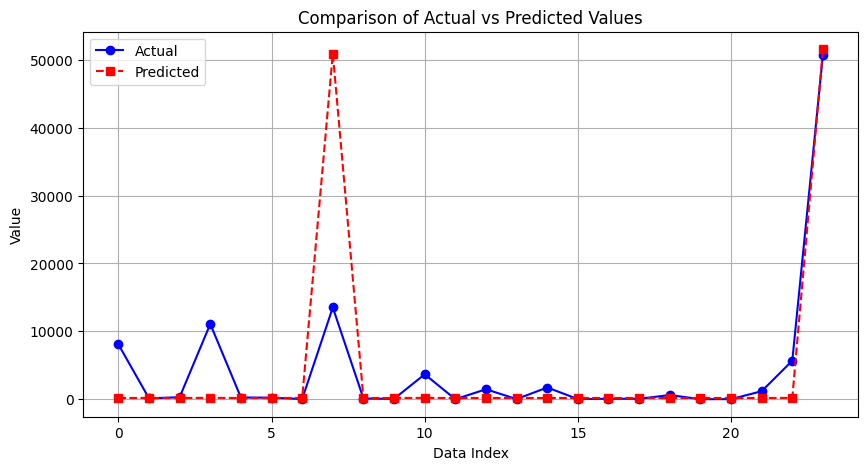

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pastikan panjang y1test dan denormalized_test_predictions sama
y_actual = y1test[:len(denormalized_test_predictions)]
y_pred = denormalized_test_predictions

# Buat indeks untuk sumbu x
x_axis = np.arange(len(y_actual))

# Plot grafik
plt.figure(figsize=(10, 5))
plt.plot(x_axis, y_actual, label="Actual", marker='o', linestyle='-', color='blue')
plt.plot(x_axis, y_pred, label="Predicted", marker='s', linestyle='--', color='red')

# Tambahkan label dan judul
plt.xlabel("Data Index")
plt.ylabel("Value")
plt.title("Comparison of Actual vs Predicted Values")
plt.legend()
plt.grid(True)

# Tampilkan grafik
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fungsi aktivasi sigmoid
def tanh(x):
    return np.tanh(x)
# Fungsi denormalisasi (sesuai rumus yang kamu berikan)
def denormalize(y_normalized, min_x, max_x):
    return (y_normalized - 0.10) * (max_x - min_x) / 0.8 + min_x

# Fungsi normalisasi
def normalize(x, min_x, max_x):
    return 0.10 + ((x - min_x) * 0.8) / (max_x - min_x)

# Fungsi denormalisasi
def denormalize(y_normalized, min_x, max_x):
    return min_x + ((y_normalized - 0.10) * (max_x - min_x)) / 0.8

# Simulasi data baru (1 tahun ke depan, 12 bulan)
xtest_future = pd.read_excel('/content/Peramalan.xlsx')  # Gantilah ini dengan fitur prediktor sebenarnya

# Hitung min dan max untuk setiap fitur
min_values = np.min(xtest_future, axis=0)
max_values = np.max(xtest_future, axis=0)

# Normalisasi data input
xtest_future_normalized = normalize(xtest_future, min_values, max_values)

# Hitung H_init_test untuk data prediksi
H_init_future = np.dot(xtest_future_normalized, best_input_weights.T) + best_biases

# Hitung hidden layer H
H_future = sigmoid(H_init_future)

# Prediksi untuk 12 bulan ke depan
y_future_pred = np.dot(H_future, beta_hat_training)

# Denormalisasi hasil prediksi
min_value = 2
max_value = 137446
denormalized_future_pred = denormalize(y_future_pred, min_value, max_value)

In [ ]:
print(denormalized_future_pred)

[76903.2916372  16182.842715     260.81244401 76865.76217011
  3944.84616695   202.38931464 22518.34362901  2524.36505659
   190.38928132 76937.29976366  9576.2009989   3429.29569031]


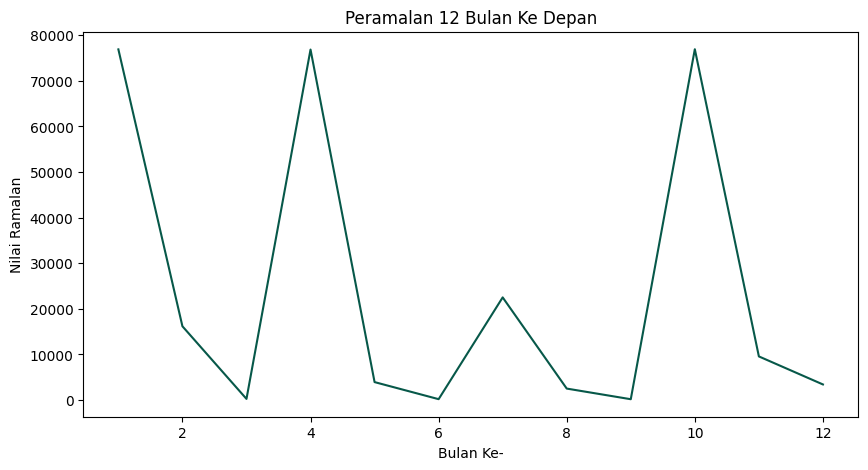

In [ ]:
# Buat sumbu waktu (misalnya bulan ke depan)
months = np.arange(1, 13)

# Plot hasil prediksi
plt.figure(figsize=(10, 5))
plt.plot(months, denormalized_future_pred, marker='None', linestyle='-', color='#075849', label="Predicted Future")

plt.xlabel("Bulan Ke-")
plt.ylabel("Nilai Ramalan")
plt.title("Peramalan 12 Bulan Ke Depan")

# Menyimpan grafik sebagai file PNG
plt.savefig('Ramalan grafik.png')

plt.show()

In [ ]:
pred_trainingg = np.dot(H_training, beta_hat_training)
print(pred_trainingg)

[0.10108691 0.10108691 0.10108695 0.10108693 0.10108692 0.10108691
 0.1010933  0.10108691 0.39636084 0.10108691 0.30267429 0.10108753
 0.10108691 0.10108691 0.39635998 0.54793031 0.10108691 0.10108692
 0.30298396 0.10152868 0.10108693 0.10108691 0.10108691 0.10108691
 0.30278544 0.10108707 0.1010871  0.10108691 0.10108691 0.10629605
 0.10108737 0.10108691 0.17110388 0.10108721 0.10108691 0.25266004
 0.10108691 0.10108696 0.25277282 0.10108691 0.10108692 0.30274928
 0.10108699 0.10108691 0.10108691 0.10108691 0.10108691 0.54772508
 0.10108691 0.10108691 0.10108705 0.10108741 0.10108692 0.10109078
 0.10108691 0.10108708 0.10108691 0.10108691 0.30278523 0.10109025
 0.10108691 0.10108691 0.10117364 0.10108691 0.10108716 0.15376922
 0.10108691 0.10108692 0.15086569 0.10108691 0.10108692 0.10108691
 0.10108691 0.10108691 0.30213635 0.10108691 0.10108691 0.54793303
 0.10108692 0.10108694 0.10108691 0.10108691 0.101087   0.10108691
 0.10198498 0.10108691 0.10108699 0.10108753 0.33889832 0.1010

In [ ]:
 #Denormalisasi prediksi training optimal
min_value = 2
max_value = 137446

def denormalize(pred_trainingg, min_value, max_value):
    return (pred_trainingg - 0.10) * (max_value - min_value) / 0.8 + min_value

In [ ]:
denormalized_training_predictions = denormalize(pred_trainingg, min_value, max_value)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Hitung RMSE
rmse_test = np.sqrt(mean_squared_error(y1train[:len(denormalized_training_predictions)], denormalized_training_predictions))
print(f"RMSE pada data training: {rmse_test:.4f}")

# Hitung MAPE
mape_test = mean_absolute_percentage_error(y1train[:len(denormalized_training_predictions)], denormalized_training_predictions)
print(f"MAPE pada data training: {mape_test:.2f}%")

RMSE pada data training: 9530.2405
MAPE pada data training: 5.36%
